# RAN run check

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from nptdms import TdmsFile

In [7]:
# 1) TDMS 파일 로드 & Available groups 출력
# file_path = '../data/250516_01.tdms'
# file_path = '../data/250516_05.tdms'
file_path = '../data/leejw.tdms'
tdms = TdmsFile.read(file_path)

print("✅ Available groups and channels:")
group_channel_map = {}
for grp in tdms.groups():
    name = grp.name
    channels = [ch.name for ch in grp.channels()]
    group_channel_map[name] = channels
    print(f" - Group: {name}")
    for ch in channels:
        print(f"    • {ch}")

✅ Available groups and channels:
 - Group: Datas
    • Time (ms)
    • Reference Position X
    • Reference Position Y
    • Measured Position X
    • Measured Position Y
    • Reference Tension L
    • Reference Tension R
    • Reference Tension T
    • Measured Tension L
    • Measured Tension R
    • Measured Tension T
    • RBF1
    • RBF2
    • RBF3
    • RBF4
    • RBF5
    • Trajectory
    • Projected Force
    • Force X
    • Force Y
    • Damp1
    • Damp2
    • Damp3
    • Damp4
    • Damp5
    • Manual Trigger



▶ Using group: Datas


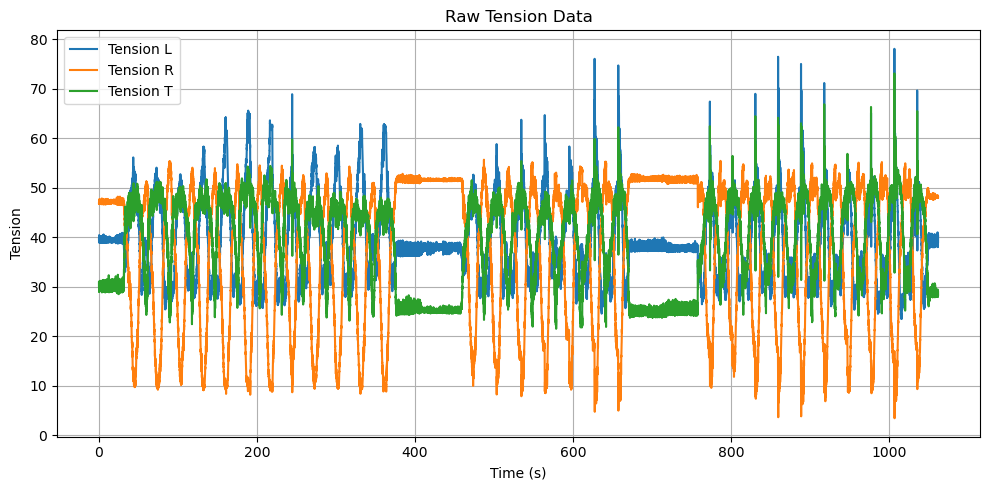

In [8]:
# 2) 사용할 그룹 선택
group = 'Datas' if 'Datas' in group_channel_map else list(group_channel_map.keys())[0]
print(f"\n▶ Using group: {group}")

# 3) 채널값 추출
ten_l = tdms[group]['Measured Tension L'][:]
ten_r = tdms[group]['Measured Tension R'][:]
ten_t = tdms[group]['Measured Tension T'][:]

# 4) 시간 축 생성 (sample_rate = 50 Hz)
time = np.arange(len(ten_l)) / 50

# 5) 시각화
plt.figure(figsize=(10,5))
plt.plot(time, ten_l, color='C0', label='Tension L')
plt.plot(time, ten_r, color='C1', label='Tension R')
plt.plot(time, ten_t, color='C2', label='Tension T')
plt.title('Raw Tension Data')
plt.xlabel('Time (s)')
plt.ylabel('Tension')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

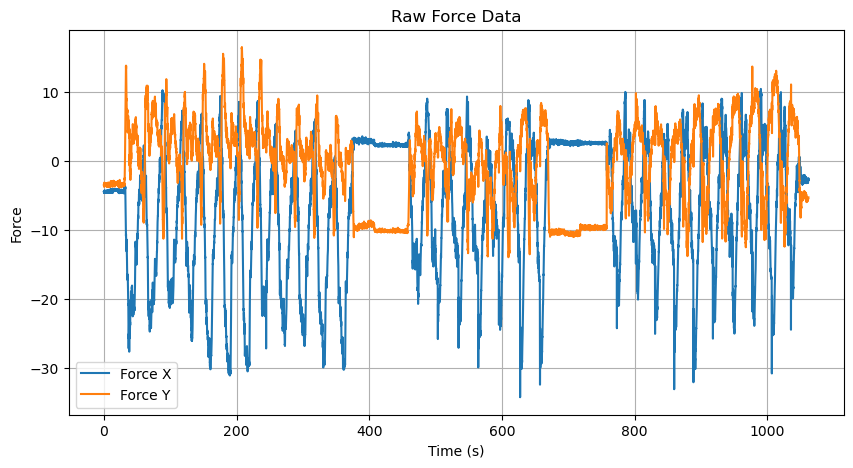

In [10]:
# 채널값 추출 (스케일 적용)
fx = tdms[group]['Force X'][:]
fy = tdms[group]['Force Y'][:]
time = np.arange(len(fx)) / 50  # sample_rate=50

plt.figure(figsize=(10,5))
plt.plot(time, fx, color='C0', label='Force X')      # 파란색
plt.plot(time, fy, color='C1', label='Force Y')      # 주황색
plt.title('Raw Force Data')
plt.xlabel('Time (s)'); plt.ylabel('Force')
plt.legend(); plt.grid(True)
plt.show()


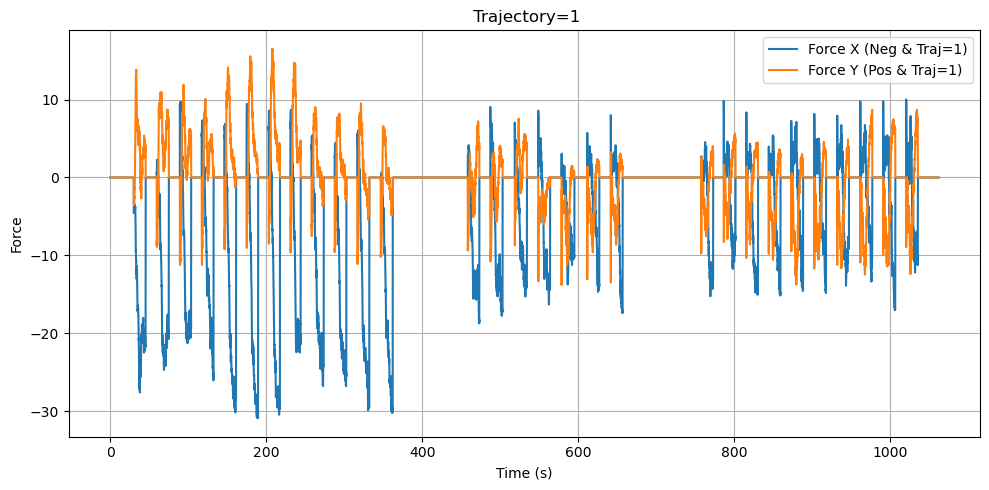

In [11]:
# 2) Force X<0, Force Y>0 필터링 & 시각화 (C0/C1 색상)
# fx_neg = np.where(fx < 0, fx, 0)
# fy_pos = np.where(fy > 0, fy, 0)

# plt.figure(figsize=(10,5))
# plt.plot(time, fx_neg, color='C0', label='Force X (Neg)')  # 파란색
# plt.plot(time, fy_pos, color='C1', label='Force Y (Pos)')  # 주황색
# plt.title('Filtered Force Data (X<0 → Keep, Y>0 → Keep)')
# plt.xlabel('Time (s)')
# plt.ylabel('Force')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# 3) #2에서 만든 fx_neg, fy_pos에 Trajectory=1 마스크 적용 & 시각화
traj = tdms[group]['Trajectory'][:]    # Trajectory 로드
mask = (traj == 1)                     # Traj=1 위치

# Traj=1 아닌 곳은 0으로 (혹은 np.nan으로 할 수도 있음)
# fx_neg_traj = np.where(mask, fx_neg, 0)
# fy_pos_traj = np.where(mask, fy_pos, 0)
fx_traj = np.where(mask, fx, 0)
fy_traj = np.where(mask, fy, 0)

# plt.figure(figsize=(10,5))
# plt.plot(time, fx_neg_traj, color='C0', label='Force X (Neg & Traj=1)')
# plt.plot(time, fy_pos_traj, color='C1', label='Force Y (Pos & Traj=1)')
# plt.title('Filtered Force Data (X<0, Y>0) & Trajectory=1')
# plt.xlabel('Time (s)')
# plt.ylabel('Force')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10,5))
plt.plot(time, fx_traj, color='C0', label='Force X (Neg & Traj=1)')
plt.plot(time, fy_traj, color='C1', label='Force Y (Pos & Traj=1)')
plt.title(' Trajectory=1')
plt.xlabel('Time (s)')
plt.ylabel('Force')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# plt.figure(figsize=(10,3))
# plt.plot(time, traj, color='C2', label='Trajectory')
# plt.title('Trajectory over Time')
# plt.xlabel('Time (s)')
# plt.ylabel('Trajectory')
# plt.yticks([0, 1])
# plt.grid(True)
# plt.legend(loc='upper right')
# plt.tight_layout()
# plt.show()

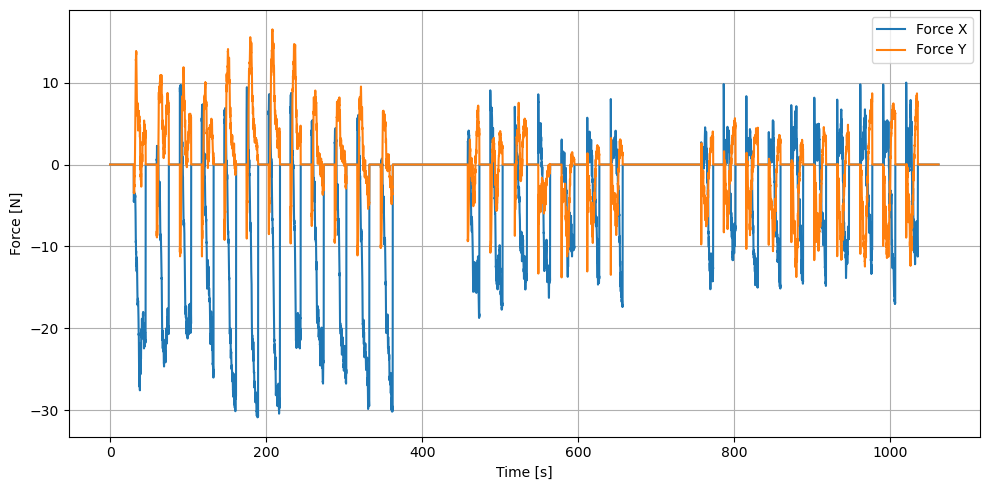

In [12]:
# 시작 시간과 샘플레이트 정의
start_time = 0  # 초
sample_rate = 50  # Hz
start_idx = int(start_time * sample_rate)

# Trajectory 및 마스크 정의 (자르기 전)
traj = tdms[group]['Trajectory'][:]
mask = (traj == 1)

# Force 데이터 자르기 전 처리
fx_traj = np.where(mask, fx, 0)
fy_traj = np.where(mask, fy, 0)

# 자르기

fx_traj_cut = fx_traj[start_idx:]
fy_traj_cut = fy_traj[start_idx:]

# 시간도 다시 정의
time_cut = np.arange(len(fx_traj_cut)) / sample_rate


# 두 번째 플롯
plt.figure(figsize=(10,5))
plt.plot(time_cut, fx_traj_cut, color='C0', label='Force X')
plt.plot(time_cut, fy_traj_cut, color='C1', label='Force Y')
# plt.title(f'Filtered Force Data (X & Y) & Trajectory=1 from {start_time}s')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


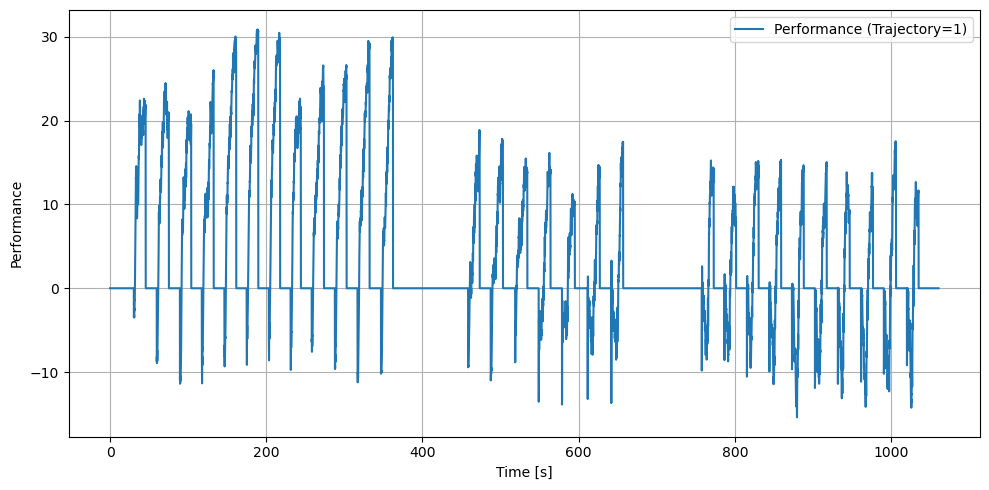

In [15]:
sample_rate = 50  # Hz
start_time = 0   # 예: 10초부터
end_time = -1     # 예: 20초까지

start_idx = int(start_time * sample_rate)
end_idx = int(end_time * sample_rate)

perf = tdms[group]['Projected Force'][:]
traj = tdms[group]['Trajectory'][:]
mask = (traj == 1)
perf_traj = np.where(mask, perf, 0)

perf_traj_cut = perf_traj[start_idx:end_idx]
time_cut = np.arange(len(perf_traj_cut)) / sample_rate

plt.figure(figsize=(10,5))
plt.plot(time_cut, perf_traj_cut, label='Performance (Trajectory=1)')
plt.xlabel('Time [s]')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


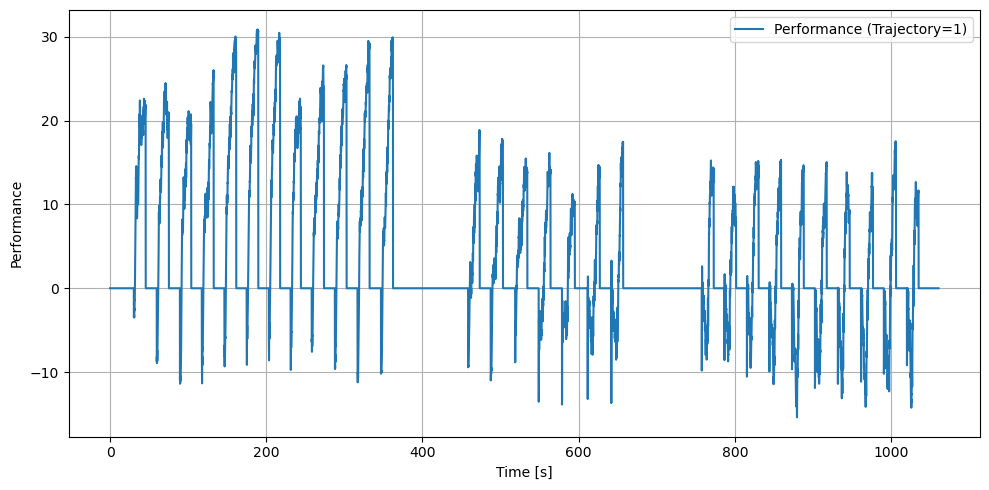

In [17]:
sample_rate = 50  # Hz
start_time = 0   # 예: 10초부터
end_time = -1     # 예: 20초까지

start_idx = int(start_time * sample_rate)
end_idx = int(end_time * sample_rate)

perf = tdms[group]['Projected Force'][:]
traj = tdms[group]['Trajectory'][:]
mask = (traj == 1)
perf_traj = np.where(mask, perf, 0)

perf_traj_cut = perf_traj[start_idx:end_idx]
time_cut = np.arange(len(perf_traj_cut)) / sample_rate

plt.figure(figsize=(10,5))
plt.plot(time_cut, perf_traj_cut, label='Performance (Trajectory=1)')
plt.xlabel('Time [s]')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


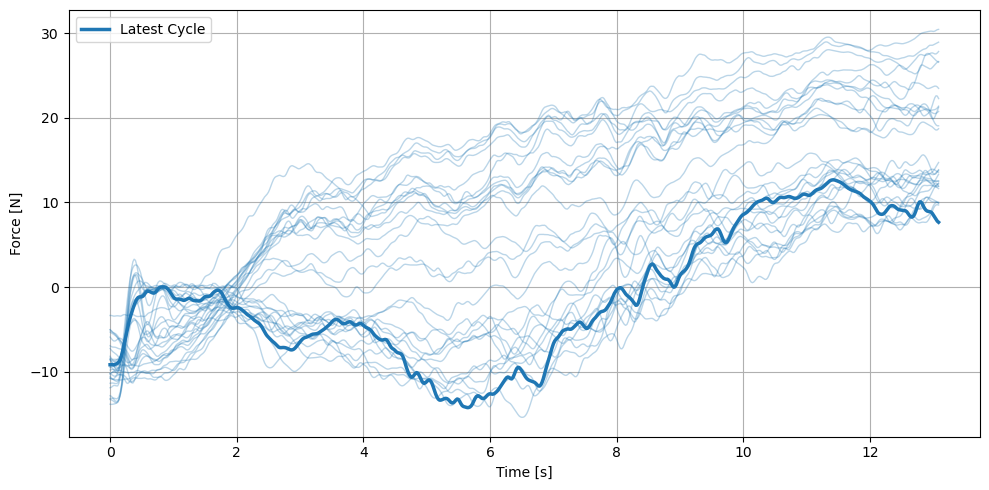

In [22]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 50  # Hz

# 1. 데이터 로드
perf = tdms[group]['Projected Force'][:]
traj = tdms[group]['Trajectory'][:]

# 2. Trajectory=1 구간의 start, end 찾기
rising = np.where((traj[:-1] == 0) & (traj[1:] == 1))[0] + 1
falling = np.where((traj[:-1] == 1) & (traj[1:] == 0))[0] + 1

# 보정
if falling[0] < rising[0]:
    falling = falling[1:]
if len(rising) > len(falling):
    rising = rising[:len(falling)]

# 3. 마지막 N사이클만 선택
num_cycles = 30
segments = []
for s, e in zip(rising[-num_cycles:], falling[-num_cycles:]):
    segments.append(perf[s:e])

# 4. 길이 맞추기
min_len = min(len(seg) for seg in segments)
segments = [seg[:min_len] for seg in segments]
segments = np.vstack(segments)

# 5. 시간축
time_short = np.arange(min_len) / sample_rate

# 6. 플롯 (마지막만 진하게)
plt.figure(figsize=(10,5))
for seg in segments[:-1]:
    plt.plot(time_short, seg, color='C0', alpha=0.3, linewidth=1)
# 마지막 사이클만 진하게
plt.plot(time_short, segments[-1], color='C0', alpha=1.0, linewidth=2.5, label='Latest Cycle')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Description

Ks = 
0.05, 3EA
0.1, 3EA
0.2, 3EA
0.4, 3EA
0.8, 3EA

AAN, 7EA
fgt, 7EA 

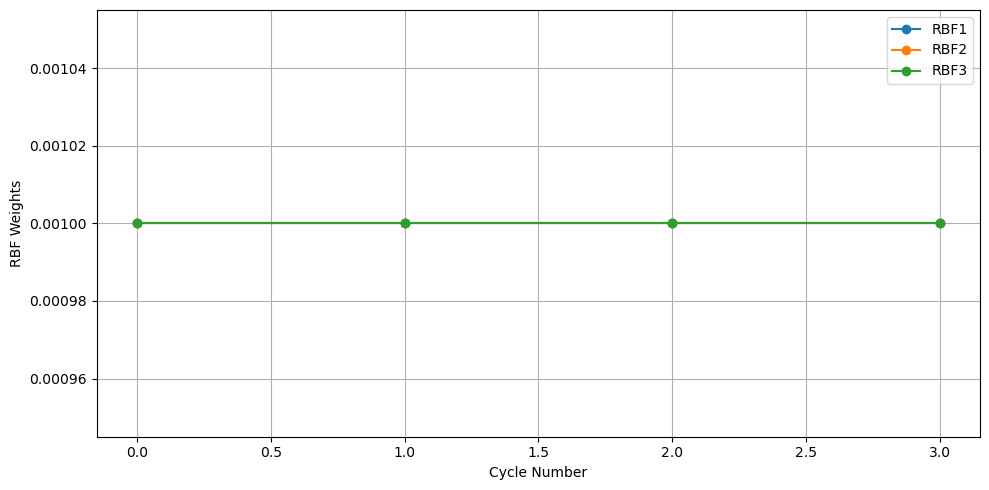

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 2) RBF 채널 & Trajectory, 시간축
w1   = tdms[group]['Damp1'][:] 
w2   = tdms[group]['Damp2'][:]
w3   = tdms[group]['Damp3'][:]
traj = tdms[group]['Trajectory'][:]
time = np.arange(len(w1)) / 50   # sample_rate = 50 Hz

# 3) Trajectory rising edge 인덱스 (0→1)
rising_idx = np.where((traj[:-1] == 0) & (traj[1:] == 1))[0] + 1

# 4) 600초 이후의 rising edge만 (여기선 -1로 되어 있으니 사실상 전체)
mask600 = time[rising_idx] >= -1
rising_idx = rising_idx[mask600]

# 5) 해당 시점의 RBF 값들
w1_rise = w1[rising_idx]
w2_rise = w2[rising_idx]
w3_rise = w3[rising_idx]

# 6) x축을 '사이클 번호(=rising edge 개수)'로
cycle_nums = np.arange(len(rising_idx))  # 0, 1, 2, ...

# --- 여기서 0~3(4사이클)만 슬라이싱 ---
num_cycles_to_show = 4
cycle_nums = cycle_nums[:num_cycles_to_show]
w1_rise = w1_rise[:num_cycles_to_show]
w2_rise = w2_rise[:num_cycles_to_show]
w3_rise = w3_rise[:num_cycles_to_show]

plt.figure(figsize=(10,5))
plt.plot(cycle_nums, w1_rise, '-o', color='C0', label='RBF1')
plt.plot(cycle_nums, w2_rise, '-o', color='C1', label='RBF2')
plt.plot(cycle_nums, w3_rise, '-o', color='C2', label='RBF3')

plt.xlabel('Cycle Number')
plt.ylabel('RBF Weights')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
